In [1]:
# importing firstly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
np.random.seed(seed=42)

In [8]:
# Definitions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

def train_knn(X_train, y_train):
    """
    X_train: Data used for training the model
    y_train: Labels used for training the model
    """
    clf = KNeighborsClassifier(n_neighbors=8)
    clf.fit(X_train, y_train)

    return clf

def evaluate_knn(clf, X, y):
    """ 
    clf: Trained (knn) classifier
    X: Data to be evaluated
    y: Labels to be evaluated
    """
    # get predictions
    y_train_pred = clf.predict(X)

    # print results
    print("Accuracy: %s" %(accuracy_score(y, y_train_pred)))


# 1. Data loading

In [9]:
# Daten laden (bereinigt)
df_test = pd.read_csv("customer_churn_test_cleaned.csv")
df_train = pd.read_csv("customer_churn_train_cleaned.csv")

In [10]:
df_train.sample(5, random_state=42) # Gender, Subscription Type, Contract Length, Churn Splaten sind kategorial

,CustomerID,Age,Gender,Tenure in Months,Tenure in Years,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
49882,283504.0,28.0,male,48.0,4.0,3.0,4.0,26.0,standard,Monthly,594.00,1.0,churn
200330,298954.0,60.0,female,8.0,0.6,20.0,8.0,12.0,standard,Monthly,380.00,6.0,churn
21894,139730.0,30.0,female,51.0,4.2,30.0,0.0,5.0,basic,Annual,761.46,2.0,no churn
202393,429650.0,56.0,male,54.0,4.5,14.0,4.0,28.0,standard,Annual,796.72,17.0,churn
186784,447970.0,22.0,female,24.0,2.0,28.0,1.0,12.0,basic,Annual,544.35,1.0,no churn


print("Der Trainingsdatensatz hat %s Datenpunkte und %s Attribute." % (len(df_train), len(df_train.columns)-1))
print("Der Testdatensatz hat %s Datenpunkte und %s Attribute." % (len(df_test), len(df_test.columns)-1))

# Coding wirth OrdinalEncoding und OneHotEncoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X_enc = enc.fit_transform(df_train[["Gender", "Subscription Type", "Contract Length"]])
df_train[["Gender", "Subscription Type", "Contract Length"]] = X_enc

In [12]:
df_train.head()

,CustomerID,Age,Gender,Tenure in Months,Tenure in Years,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,393421.0,41.0,0.0,46.0,3.8,24.0,4.0,5.0,0.0,2.0,835.98,15.0,no churn
1,128840.0,45.0,1.0,26.0,2.1,12.0,3.0,11.0,2.0,0.0,993.52,24.0,no churn
2,53841.0,32.0,1.0,12.0,1.0,22.0,0.0,19.0,2.0,2.0,516.27,20.0,no churn
3,153877.0,44.0,1.0,60.0,5.0,27.0,2.0,12.0,1.0,0.0,675.85,26.0,no churn
4,263289.0,29.0,0.0,17.0,1.4,25.0,10.0,1.0,2.0,1.0,723.00,27.0,churn


In [13]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(df_train[["Churn"]])

df_encoded = pd.DataFrame(X_enc, columns=enc.get_feature_names_out(["Churn"]))

df_train = df_train.drop(columns=["Churn"])

df_train = pd.concat([df_train, df_encoded], axis=1)

/Users/cbarank/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
df_train.head()

,CustomerID,Age,Gender,Tenure in Months,Tenure in Years,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn_churn,Churn_no churn
0,393421.0,41.0,0.0,46.0,3.8,24.0,4.0,5.0,0.0,2.0,835.98,15.0,0.0,1.0
1,128840.0,45.0,1.0,26.0,2.1,12.0,3.0,11.0,2.0,0.0,993.52,24.0,0.0,1.0
2,53841.0,32.0,1.0,12.0,1.0,22.0,0.0,19.0,2.0,2.0,516.27,20.0,0.0,1.0
3,153877.0,44.0,1.0,60.0,5.0,27.0,2.0,12.0,1.0,0.0,675.85,26.0,0.0,1.0
4,263289.0,29.0,0.0,17.0,1.4,25.0,10.0,1.0,2.0,1.0,723.00,27.0,1.0,0.0


# It is time to apply KNN

In [15]:
#Gleiche Verwenfungen für df_test:

enc = OrdinalEncoder()
X_enc = enc.fit_transform(df_test[["Gender", "Subscription Type", "Contract Length"]])
df_test[["Gender", "Subscription Type", "Contract Length"]] = X_enc

In [16]:
enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(df_test[["Churn"]])
df_encoded = pd.DataFrame(X_enc, columns=enc.get_feature_names_out(["Churn"]))
df_test = df_test.drop(columns=["Churn"])
df_test = pd.concat([df_test, df_encoded], axis=1)

/Users/cbarank/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
df_test.head()

,CustomerID,Age,Gender,Tenure in Months,Tenure in Years,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn_churn,Churn_no churn
0,434133.0,46.0,1.0,19.0,1.5,16.0,0.0,4.0,2.0,2.0,879.47,30.0,0.0,1.0
1,12372.0,37.0,0.0,55.0,4.5,5.0,0.0,9.0,0.0,0.0,537.69,1.0,0.0,1.0
2,106811.0,37.0,1.0,40.0,3.3,4.0,3.0,23.0,2.0,0.0,663.00,29.0,1.0,0.0
3,214282.0,22.0,0.0,21.0,1.7,1.0,10.0,27.0,2.0,2.0,317.00,28.0,1.0,0.0
4,222396.0,49.0,0.0,19.0,1.5,14.0,4.0,4.0,0.0,0.0,773.72,9.0,0.0,1.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train = df_train.drop(columns=["Churn_churn", "Churn_no churn", "CustomerID"])
y_train = df_train["Churn_churn"]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
X_test = df_test.drop(columns=["Churn_no churn", "Churn_churn", "CustomerID"]) #feature
y_test = df_test["Churn_churn"] #label

accuracy = knn.score(X_test, y_test)

In [20]:
accuracy

0.8347590639272803

# Let to check correlation reletionships

In [21]:
corr_matrix = df_train.corr()
corr_matrix

,CustomerID,Age,Gender,Tenure in Months,Tenure in Years,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn_churn,Churn_no churn
CustomerID,1.000000,0.001660,0.001422,0.001439,0.001426,0.001453,0.001586,0.002524,0.000046,0.000435,-0.001400,0.003510,0.000555,-0.000555
Age,0.001660,1.000000,-0.036063,-0.011082,-0.011105,-0.009012,0.197405,0.070732,-0.003639,-0.001381,-0.094637,0.032442,0.196592,-0.196592
Gender,0.001422,-0.036063,1.000000,0.007524,0.007527,0.009385,-0.102102,-0.053856,0.001325,-0.002888,0.072818,0.194709,-0.162938,0.162938
Tenure in Months,0.001439,-0.011082,0.007524,1.000000,0.999806,-0.039270,-0.030376,-0.016448,-0.031791,-0.000124,0.021307,-0.005023,-0.019531,0.019531
Tenure in Years,0.001426,-0.011105,0.007527,0.999806,1.000000,-0.039071,-0.030363,-0.016464,-0.031883,-0.000122,0.021276,-0.005042,-0.019495,0.019495
Usage Frequency,0.001453,-0.009012,0.009385,-0.039270,-0.039071,1.000000,-0.025630,-0.017419,-0.000384,-0.000370,0.019696,-0.005592,-0.051288,0.051288
Support Calls,0.001586,0.197405,-0.102102,-0.030376,-0.030363,-0.025630,1.000000,0.190557,-0.011488,-0.000183,-0.256482,0.087448,0.534186,-0.534186
Payment Delay,0.002524,0.070732,-0.053856,-0.016448,-0.016464,-0.017419,0.190557,1.000000,-0.004483,-0.002446,-0.139363,0.045448,0.336416,-0.336416
Subscription Type,0.000046,-0.003639,0.001325,-0.031791,-0.031883,-0.000384,-0.011488,-0.004483,1.000000,0.004893,0.007843,-0.000883,-0.012952,0.012952
Contract Length,0.000435,-0.001381,-0.002888,-0.000124,-0.000122,-0.000370,-0.000183,-0.002446,0.004893,1.000000,0.000887,0.002657,-0.001388,0.001388


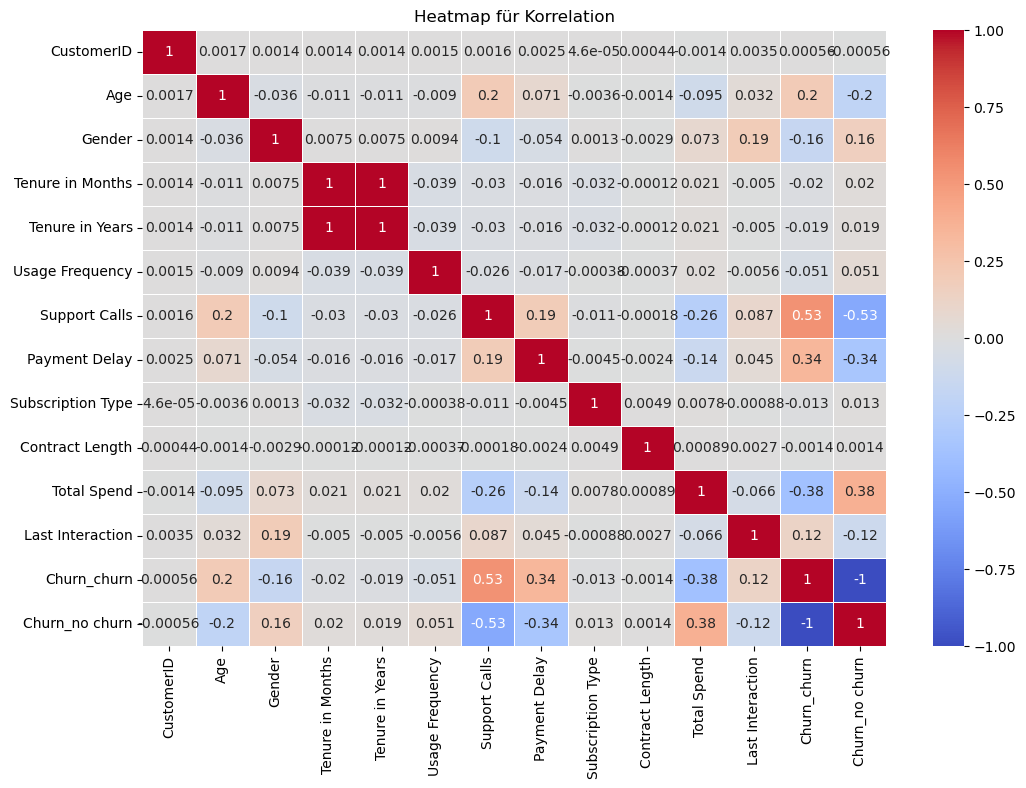

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap für Korrelation")
plt.show()


# Tenure in Months and Tenure in Years muss go

#### Heatmap and correlation matrix show high correlations, especially between "Tenure in Months" and "Tenure in Years". Such features could be redundant and increase model complexity.

# And now it is time to controll _*Accuracy*_

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [69]:
accuracy_scaled = knn.score(X_test_scaled, y_test)
print(f"Modellgenauigkeit mit skalierten Daten: {accuracy_scaled}")


Modellgenauigkeit mit skalierten Daten: 0.8643497924632162
